In [2]:
# 02_feature_engineering.ipynb

import pandas as pd
from src.data_loader import load_titanic_data
from src.features import preprocess

# Load raw data
train_df, test_df = load_titanic_data(data_dir="V:/titanic")

# Apply preprocessing
train_proc = preprocess(train_df)
test_proc  = preprocess(test_df)

# Inspect
print("Train (processed) shape:", train_proc.shape)
display(train_proc.head())

print("Test (processed) shape:", test_proc.shape)
display(test_proc.head())


Train (processed) shape: (891, 28)


,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,...,Title_Mrs,Title_Other,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,2,...,False,False,False,False,False,False,False,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,2,...,True,False,False,True,False,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,...,False,False,False,False,False,False,False,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,2,...,True,False,False,True,False,False,False,False,False,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,...,False,False,False,False,False,False,False,False,False,True


Test (processed) shape: (418, 26)


,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,IsAlone,...,Title_Mr,Title_Mrs,Title_Other,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_U
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,1,1,...,True,False,False,False,False,False,False,False,False,True
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,2,0,...,False,True,False,False,False,False,False,False,False,True
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,1,...,True,False,False,False,False,False,False,False,False,True
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,1,1,...,True,False,False,False,False,False,False,False,False,True
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,3,0,...,False,True,False,False,False,False,False,False,False,True


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_loader import load_titanic_data
from src.features import preprocess

# Load & preprocess
train_raw, _     = load_titanic_data(data_dir="V:/titanic")
train_proc       = preprocess(train_raw)

In [8]:
from src.features import add_title, add_family_features, add_deck

# Engineered but still with original columns
train_eng = add_deck(add_family_features(add_title(train_raw)))

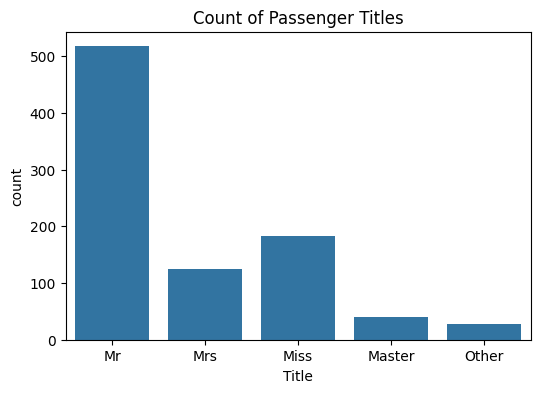

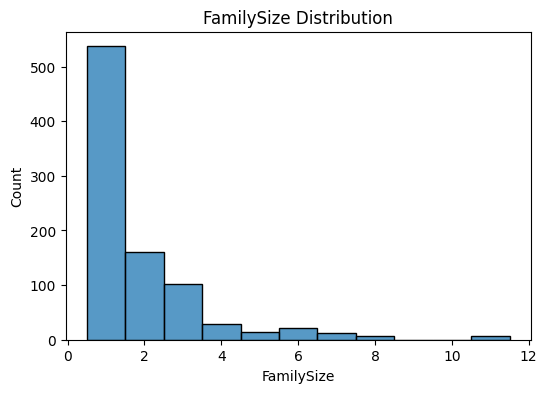

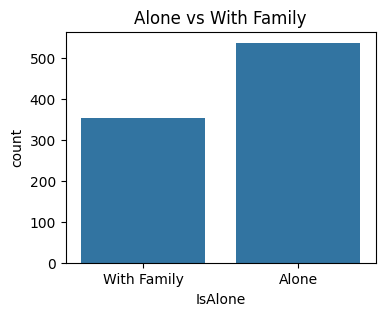

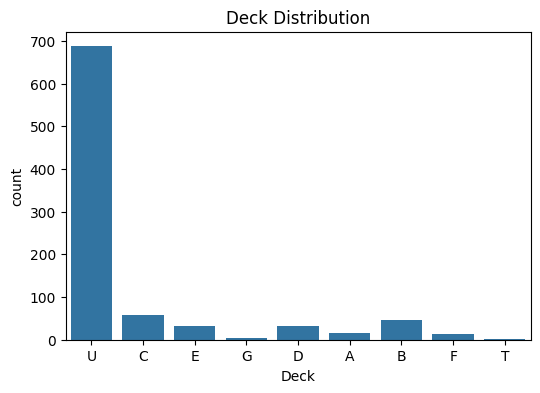

In [9]:
# Title counts
plt.figure(figsize=(6,4))
sns.countplot(x='Title', data=train_eng)
plt.title("Count of Passenger Titles")
plt.show()

# FamilySize
plt.figure(figsize=(6,4))
sns.histplot(train_eng['FamilySize'], discrete=True, bins=range(1, train_eng['FamilySize'].max()+2))
plt.title("FamilySize Distribution")
plt.show()

# IsAlone
plt.figure(figsize=(4,3))
sns.countplot(x='IsAlone', data=train_eng)
plt.title("Alone vs With Family")
plt.xticks([0,1], ['With Family','Alone'])
plt.show()

# Deck
plt.figure(figsize=(6,4))
sns.countplot(x='Deck', data=train_eng)
plt.title("Deck Distribution")
plt.show()

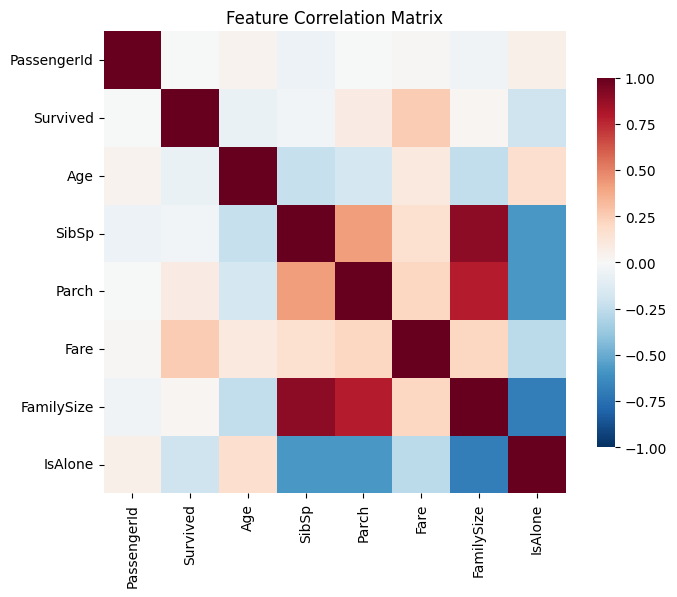

In [15]:
import numpy as np
num_df = train_proc.select_dtypes(include=[np.number])

# Compute correlations on the numeric subset
corr = num_df.corr()

# Plot heatmap of correlations (showing strong correlations)
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='RdBu_r', center=0,
            vmin=-1, vmax=1,
            square=True,
            cbar_kws={'shrink':.8})
plt.title("Feature Correlation Matrix")
plt.show()

In [20]:
missing = X.isnull().sum()
print("Missing:\n", missing[missing>0])

Missing:
 Series([], dtype: int64)


In [18]:
X = train_proc.drop(columns=['Survived', 'PassengerId', 'Cabin'])
y = train_proc['Survived']